In [109]:
import pandas as pd

train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

In [110]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [111]:
train_set.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [112]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [113]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


OBSERVATION

the train_set.info() show that there are 891 entries and a total of 12 columns.
All except Age, Cabin, and Embarked has no missing values. it also show the datatypes:

float ==> 2

int64 ==> 5

objects ==> 5

below also show the informations about the test set with 418 entries, 11 columns, the survivev column is not included here. test set also have missing values... Age, Fare, and Cabin

In [114]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [115]:
#lets look into the values of Embarked column
print(train_set['Embarked'].value_counts())
print('='*50)
print(test_set['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64
S    270
C    102
Q     46
Name: Embarked, dtype: int64


In [116]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
#from sklearn.compose import make_column_transformer

ordinal = OrdinalEncoder()
imputer =  SimpleImputer(strategy='most_frequent')
impute =  SimpleImputer(strategy='median')

#replacing the missing value in the train_set Embarked column with the most frequent
train_set['Embarked'] = imputer.fit_transform((train_set['Embarked'].values).reshape(-1, 1))

#handling both train and test set Age nan values with the median
train_set['Age'] = impute.fit_transform((train_set['Age'].values).reshape(-1, 1))
test_set['Age'] = impute.fit_transform((test_set['Age'].values).reshape(-1, 1))

#encoding train_set categorical data
train_set['Sex'] = ordinal.fit_transform((train_set['Sex'].values).reshape(-1, 1))
train_set['Embarked'] = ordinal.fit_transform((train_set['Embarked'].values).reshape(-1, 1))
#encoding test_set categorical data
test_set['Sex'] = ordinal.fit_transform((test_set['Sex'].values).reshape(-1, 1))
test_set['Embarked'] = ordinal.fit_transform((test_set['Embarked'].values).reshape(-1, 1))


#lets handle the Fare column on the test set wtih median value
test_set['Fare'] = impute.fit_transform((test_set['Fare'].values).reshape(-1, 1))


In [117]:
print(train_set['Embarked'].value_counts())

2.0    646
0.0    168
1.0     77
Name: Embarked, dtype: int64


In [118]:
print(train_set.isna().sum())
print('='*50)
print(test_set.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [119]:
#lets drop the irrelevant features

train_set = train_set.drop(['Name', 'Ticket', 'Cabin'], axis=1)
test_set = test_set.drop(['Name', 'Ticket', 'Cabin'], axis=1)


In [120]:
train_set.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1.0,22.0,1,0,7.2500,2.0
1,2,1,1,0.0,38.0,1,0,71.2833,0.0
2,3,1,3,0.0,26.0,0,0,7.9250,2.0
3,4,1,1,0.0,35.0,1,0,53.1000,2.0
4,5,0,3,1.0,35.0,0,0,8.0500,2.0


In [121]:
test_set.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1.0,34.5,0,0,7.8292,1.0
1,893,3,0.0,47.0,1,0,7.0000,2.0
2,894,2,1.0,62.0,0,0,9.6875,1.0
3,895,3,1.0,27.0,0,0,8.6625,2.0
4,896,3,0.0,22.0,1,1,12.2875,2.0


In [122]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    float64
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 62.8 KB


In [123]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    float64
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 26.2 KB


In [124]:
corr_matrix = train_set.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
Embarked      -0.167675
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64

In [125]:
train_set.shape

(891, 9)

In [126]:
test_set.shape

(418, 8)

In [127]:
#to create a validation set, lets split our training set

from sklearn.model_selection import train_test_split

#Train set
X_train = train_set.drop('Survived', axis=1)
Y_train = train_set['Survived'].copy()
pass_Id = train_set['PassengerId'].copy()

x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)


In [128]:
print(x_train.shape)
print(x_val.shape)

(712, 8)
(179, 8)


In [129]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

log_clf = LogisticRegression()
sgd_clf = SGDClassifier()
svc_clf = SVC(kernel='rbf', gamma=10, C=10, probability=True)
tree_clf = DecisionTreeClassifier(random_state=0)
forest_clf = RandomForestClassifier(random_state=0)

In [131]:
#fitting the mdoels
for clf in (log_clf, sgd_clf, svc_clf, tree_clf, forest_clf):
    clf.fit(x_train, y_train)


In [132]:
#Training Accuracies
acc_score1 = f'{(log_clf.score(x_train, y_train)*100):.2f}%'
acc_score2 = f'{(sgd_clf.score(x_train, y_train)*100):.2f}%'
acc_score3 = f'{(svc_clf.score(x_train, y_train)*100):.2f}%'
acc_score4 = f'{(tree_clf.score(x_train, y_train)*100):.2f}%'
acc_score5 = f'{(forest_clf.score(x_train, y_train)*100):.2f}%'

training_accuracy = pd.DataFrame({'Model': ['LogisticRegression', 'SGDClassifier', 'SVC(kernel="rbf")', 'DecisionTree', 'RandomForestClassifier'],
                   'Training Accuracy': [acc_score1, acc_score2, acc_score3, acc_score4, acc_score5]})
training_acc_df = training_accuracy.sort_values(by='Training Accuracy')
training_acc_df.head()

,Model,Training Accuracy
3,DecisionTree,100.00%
4,RandomForestClassifier,100.00%
1,SGDClassifier,79.49%
0,LogisticRegression,79.78%
2,"SVC(kernel=""rbf"")",98.17%


In [133]:
#now lets check for the accuracy score on the validation set

#validation set scaling
x_val = scaler.transform(x_val)

from sklearn.metrics import accuracy_score

for clf in (log_clf, sgd_clf, svc_clf, tree_clf, forest_clf):
    y_pred = clf.predict(x_val)
    print(clf.__class__.__name__, f'{(accuracy_score(y_val, y_pred)*100):.2f}%')

LogisticRegression 79.89%
SGDClassifier 79.33%
SVC 64.80%
DecisionTreeClassifier 81.01%
RandomForestClassifier 84.92%


In [134]:
import joblib
joblib.dump(forest_clf, 'forest_clf_tit.pkl')

['forest_clf_tit.pkl']

In [135]:
forest_pred = forest_clf.predict(x_val)
tree_pred = tree_clf.predict(x_val)

In [136]:
from sklearn.model_selection import cross_val_score
forest_scores = cross_val_score(forest_clf, x_val, y_val, cv=5, scoring='accuracy').mean()
tree_scores = cross_val_score(tree_clf, x_val, y_val, cv=5, scoring='accuracy').mean()


#output
print(f'RANDOMFORESTCLASSIFIER TESTING ACCURACY: {(forest_scores*100):.2f}%')
print(f'DECISIONTREE TESTING ACCURACY: {(tree_scores*100):.2f}%')


RANDOMFORESTCLASSIFIER TESTING ACCURACY: 82.13%
DECISIONTREE TESTING ACCURACY: 81.54%


In [137]:
from sklearn.metrics import precision_score, recall_score
print('Precision Score:', precision_score(y_val, forest_pred))
print('Recall Score:', recall_score(y_val, forest_pred))

Precision Score: 0.8888888888888888
Recall Score: 0.6956521739130435


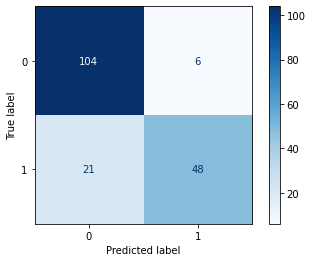

In [138]:
#plotting confusion matrix for RandomForest
from sklearn.metrics import plot_confusion_matrix
conf_mat = plot_confusion_matrix(forest_clf, x_val, y_val, cmap='Blues', values_format='d')

In [139]:
conf_mat.confusion_matrix

array([[104,   6],
       [ 21,  48]], dtype=int64)

In [140]:
y_val.value_counts()

0    110
1     69
Name: Survived, dtype: int64

In [142]:
from sklearn.metrics import f1_score

In [143]:
f1_score(y_val, forest_pred)

0.7804878048780488

In [144]:
forest_clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [145]:
#fitting to the test set
#Train set
X_test = test_set
pass_Id_test = test_set['PassengerId'].copy()

x_test = scaler.transform(X_test)

In [146]:
y_test_pred = forest_clf.predict(x_test)

In [147]:
y_test_predicted = pd.DataFrame(y_test_pred, columns=['Survived'])
y_test_predicted.head()

,Survived
0,0
1,0
2,0
3,0
4,0


In [148]:
pass_id = pd.DataFrame(pass_Id_test, columns=['PassengerId'])
pass_id.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [149]:
titanic_submission = pd.concat([pass_id, y_test_predicted], axis=1)
titanic_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [150]:
titanic_submission.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,1


In [151]:
titanic_submission['Survived'].value_counts()

0    288
1    130
Name: Survived, dtype: int64

In [152]:
titanic_submission.to_csv('titanic_submission01.csv', index=False)

In [ ]:
#param_grid = [
    #{'n_estimators': range(1, 100), 'max_features': range(1, 9), 'max_depth': range(2, 10)},
    #{'bootstrap': [False], 'n_estimators': range(100, 200, 10), 'max_features': [2, 4, 6, 10], 'max_depth': range(2, 10)},
#]

In [ ]:
#from sklearn.model_selection import GridSearchCV
#grid_search = GridSearchCV(forest_clf, param_grid, cv=5, scoring='accuracy',
                          return_train_score=True)

In [ ]:
#grid_search.fit(x_train, y_train)

In [ ]:
#grid_search.best_params_

In [ ]:
#grid_search.best_estimator_

In [ ]:
#joblib.dump(grid_search.best_estimator_, 'titanic_tuned_params.pkl')

In [ ]:
#tuned_forest_params = grid_search.best_estimator_